### 역대 월드컵의 관중 수 출력하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

worldcup = pd.read_csv('WorldCups.csv')
worldcup = worldcup[['Year','Attendance']]
worldcup.sort_values(by='Attendance', ascending=False)

,Year,Attendance
6,1962,893.172
5,1958,819.810
4,1954,768.607
0,1930,590.549
2,1938,375.700
1,1934,363.000
14,1994,3.587.538
19,2014,3.386.810
17,2006,3.359.439
18,2010,3.178.856


### 역대 월드컵 관중 수 그래프

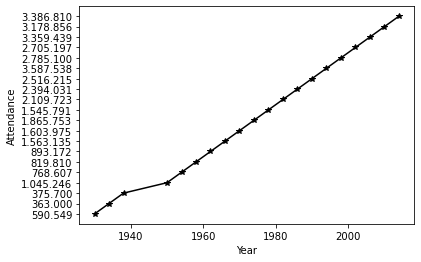

In [85]:
plt.plot(worldcup['Year'],worldcup['Attendance'], marker='*', color='black')
plt.xlabel('Year')
plt.ylabel('Attendance')
plt.savefig('image.svg', format='svg')

### 역대 월드컵의 경기당 득점 수 출력

In [86]:
worldcup = pd.read_csv('WorldCups.csv')
worldcup = worldcup[['Year', 'GoalsScored', 'MatchesPlayed']]
# Goals Per Match
worldcup['GoalsPerMatch'] = worldcup['GoalsScored'] / worldcup['MatchesPlayed']
worldcup

,Year,GoalsScored,MatchesPlayed,GoalsPerMatch
0,1930,70,18,3.888889
1,1934,70,17,4.117647
2,1938,84,18,4.666667
3,1950,88,22,4.000000
4,1954,140,26,5.384615
5,1958,126,35,3.600000
6,1962,89,32,2.781250
7,1966,89,32,2.781250
8,1970,95,32,2.968750
9,1974,97,38,2.552632


### 역대 월드컵의 경기당 득점 수 그래프로 출력

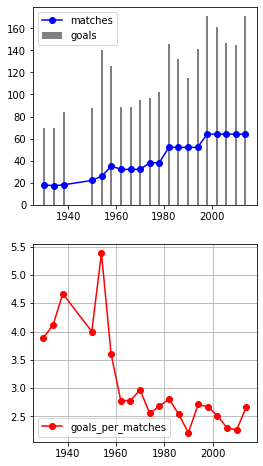

In [87]:
# 첫 번째 그래프
fig, axes = plt.subplots(2,1,figsize=(4,8))
axes[0].bar(x=worldcup['Year'], height=worldcup['GoalsScored'], color='grey', label='goals')

axes[0].plot(worldcup['Year'], worldcup['MatchesPlayed'], marker='o', color='blue', label='matches')

axes[0].legend(loc='upper left')

# 두 번째 그래프
axes[1].grid(True)
axes[1].plot(worldcup['Year'], worldcup['GoalsPerMatch'], marker='o', color='red', label='goals_per_matches')

axes[1].legend(loc='lower left')

#plt.savefig("image.svg", format="svg")


### 월드컵 매체 데이터 전처리

In [88]:
match = pd.read_csv('WorldCupMatches.csv')

In [89]:
match.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [22]:
match['Home Team Name'].unique()

array(['France', 'USA', 'Yugoslavia', 'Romania', 'Argentina', 'Chile',
       'Uruguay', 'Brazil', 'Paraguay', 'Austria', 'Hungary',
       'Switzerland', 'Sweden', 'Germany', 'Spain', 'Italy',
       'Czechoslovakia', 'Cuba', 'England', 'Germany FR', 'Turkey',
       'Soviet Union', 'Northern Ireland', 'Mexico', 'Wales', 'Portugal',
       'Korea DPR', 'Peru', 'Belgium', 'Bulgaria', 'German DR', 'Zaire',
       'Poland', 'Australia', 'Scotland', 'Netherlands', 'Haiti',
       'Tunisia', 'Algeria', 'Honduras', 'Canada', 'Morocco',
       'Korea Republic', 'Iraq', 'Denmark', 'rn">United Arab Emirates',
       'Costa Rica', 'Cameroon', 'rn">Republic of Ireland', 'Colombia',
       'Norway', 'Nigeria', 'Saudi Arabia', 'Bolivia', 'Russia', 'Greece',
       'Jamaica', 'South Africa', 'Japan', 'Croatia', 'China PR',
       'Senegal', 'Slovenia', 'Ecuador', 'rn">Trinidad and Tobago',
       'rn">Serbia and Montenegro', 'Angola', 'Czech Republic', 'Togo',
       'Iran', "C�te d'Ivoire", 'Ghana

In [91]:
match = match.dropna()
match.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [38]:
match.isnull().sum()

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              0
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

In [92]:
match[match['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()

rn">Republic of Ireland       5
rn">Serbia and Montenegro     1
rn">Bosnia and Herzegovina    1
rn">United Arab Emirates      1
rn">Trinidad and Tobago       1
Name: Home Team Name, dtype: int64

In [93]:
match = match.replace('Germany FR', 'Germany').replace("C�te d'Ivoire", "Côte d'Ivoire")

In [94]:
match = match.replace('Germany FR', 'Germany').replace("C�te d'Ivoire", "Côte d'Ivoire")
match = match.replace('rn”>Bosnia and Herzegovina', 'Bosnia and Herzegovina').replace('rn”>Serbia and Montenegro','Serbia and Montenegro')
match = match.replace('rn”>Trinidad and Tobago', 'Trinidad and Tobago').replace('rn”>United Arab Emirates', 'United Arab Emirates')
match = match.replace('Soviet Union', 'Russia')


match = match.drop_duplicates()

dupli = match.duplicated()

In [95]:
dupli = worldcup.duplicated()
len(dupli[dupli==True])

0

In [96]:
match['Home Team Name'].unique()

array(['France', 'USA', 'Yugoslavia', 'Romania', 'Argentina', 'Chile',
       'Uruguay', 'Brazil', 'Paraguay', 'Austria', 'Hungary',
       'Switzerland', 'Sweden', 'Germany', 'Spain', 'Italy',
       'Czechoslovakia', 'Cuba', 'England', 'Turkey', 'Russia',
       'Northern Ireland', 'Mexico', 'Wales', 'Portugal', 'Korea DPR',
       'Peru', 'Belgium', 'Bulgaria', 'German DR', 'Zaire', 'Poland',
       'Australia', 'Scotland', 'Netherlands', 'Haiti', 'Tunisia',
       'Algeria', 'Honduras', 'Canada', 'Morocco', 'Korea Republic',
       'Iraq', 'Denmark', 'rn">United Arab Emirates', 'Costa Rica',
       'Cameroon', 'rn">Republic of Ireland', 'Colombia', 'Norway',
       'Nigeria', 'Saudi Arabia', 'Bolivia', 'Greece', 'Jamaica',
       'South Africa', 'Japan', 'Croatia', 'China PR', 'Senegal',
       'Slovenia', 'Ecuador', 'rn">Trinidad and Tobago',
       'rn">Serbia and Montenegro', 'Angola', 'Czech Republic', 'Togo',
       'Iran', "Côte d'Ivoire", 'Ghana', 'Ukraine', 'Serbia',
      

In [49]:
'''
names = match[match['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

wrong = list(names.index)
wrong

correct = [name.split('>')[1] for name in wrong]
correct

old_name = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana']
new_name = ['Germany', 'Maracan Stadium', 'Maracan Stadium']

wrong = wrong + old_name
correct = correct + new_name

for index, wr in enumerate(wrong):
    print(index, wr)
    
    
for index, wr in enumerate(wrong):
    match = match.replace(wrong[index], correct[index])

'''

'\nnames = match[match[\'Home Team Name\'].str.contains(\'rn">\')][\'Home Team Name\'].value_counts()\nnames\n\nwrong = list(names.index)\nwrong\n\ncorrect = [name.split(\'>\')[1] for name in wrong]\ncorrect\n\nold_name = [\'Germany FR\', \'Maracan� - Est�dio Jornalista M�rio Filho\', \'Estadio do Maracana\']\nnew_name = [\'Germany\', \'Maracan Stadium\', \'Maracan Stadium\']\n\nwrong = wrong + old_name\ncorrect = correct + new_name\n\nfor index, wr in enumerate(wrong):\n    print(index, wr)\n    \n    \nfor index, wr in enumerate(wrong):\n    match = match.replace(wrong[index], correct[index])\n\n'

### 국가별 득점수

In [57]:
home = match.groupby(['Home Team Name'])['Home Team Goals'].sum()
away = match.groupby(['Away Team Name'])['Away Team Goals'].sum()

In [60]:
goal_per_country = pd.concat([home, away], axis=1, sort=True).fillna(0)
goal_per_country['Goals'] = goal_per_country['Home Team Goals'] + goal_per_country['Away Team Goals']
goal_per_country = goal_per_country['Goals'].sort_values(ascending=False)

goal_per_country = goal_per_country.astype(int)
print(goal_per_country)

Germany                       222
Brazil                        221
Argentina                     131
Italy                         128
France                        106
Spain                          92
Hungary                        87
Netherlands                    86
Uruguay                        80
England                        79
Sweden                         74
Russia                         66
Yugoslavia                     60
Mexico                         57
Belgium                        52
Switzerland                    45
Poland                         44
Czechoslovakia                 44
Portugal                       43
Austria                        43
Chile                          40
USA                            37
Korea Republic                 31
Paraguay                       30
Romania                        30
Denmark                        27
Colombia                       26
Scotland                       25
Bulgaria                       22
Croatia       

### 국가별 득점수 그래프

In [61]:
goal_per_country = goal_per_country[:10]

In [62]:
# x, y값 저장
x = goal_per_country.index
y = goal_per_country.values

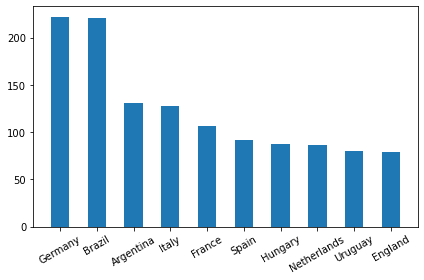

In [69]:
#그래프 그리기
fig, ax = plt.subplots()
ax.bar(x, y, width = 0.5)
# x축 항목 이름 지정, 30도 회전
plt.xticks(x, rotation=30)
plt.tight_layout()

#그래프 출력
plt.savefig("image.svg", format="svg")

### 2014 월드컵 다득점 국가 순위

In [98]:
match2014 = match[match['Year'] == 2014]
match2014.head(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
772,2014.0,12 Jun 2014 - 17:00,Group A,Arena de Sao Paulo,Sao Paulo,Brazil,3.0,1.0,Croatia,,62103.0,1.0,1.0,NISHIMURA Yuichi (JPN),SAGARA Toru (JPN),NAGI Toshiyuki (JPN),255931.0,300186456.0,BRA,CRO
773,2014.0,13 Jun 2014 - 13:00,Group A,Estadio das Dunas,Natal,Mexico,1.0,0.0,Cameroon,,39216.0,0.0,0.0,ROLDAN Wilmar (COL),CLAVIJO Humberto (COL),DIAZ Eduardo (COL),255931.0,300186492.0,MEX,CMR


In [99]:
home_team_goal = match2014.groupby('Home Team Name')['Home Team Goals'].sum()
away_team_goal = match2014.groupby('Away Team Name')['Away Team Goals'].sum()

team_goal_2014 = pd.concat([home_team_goal, away_team_goal], axis=1).fillna(0)
team_goal_2014['goals'] = team_goal_2014['Home Team Goals'] + team_goal_2014['Away Team Goals'] 
team_goal_2014 = team_goal_2014.drop(columns = ['Home Team Goals', 'Away Team Goals'])

team_goal_2014 = team_goal_2014.astype(int)
team_goal_2014 = team_goal_2014['goals'].sort_values(ascending=False)

print(team_goal_2014)

Germany                       16
Netherlands                   15
Colombia                      12
Brazil                        11
France                        10
Argentina                      8
Switzerland                    7
Croatia                        6
Algeria                        6
Chile                          6
Belgium                        6
Mexico                         5
USA                            5
Costa Rica                     5
Spain                          4
Portugal                       4
Uruguay                        4
rn">Bosnia and Herzegovina     4
Ghana                          4
Côte d'Ivoire                  4
Korea Republic                 3
Nigeria                        3
Ecuador                        3
Australia                      3
Greece                         3
Italy                          2
Japan                          2
England                        2
Russia                         2
IR Iran                        1
Honduras  

### 2014 월드컵 다득점 국가 순위 그래프

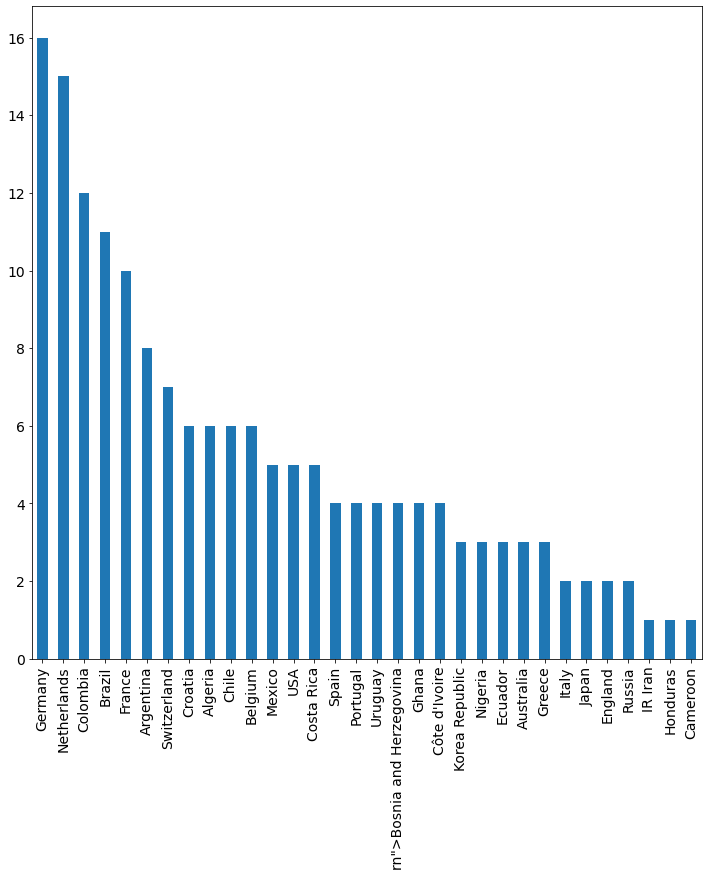

In [101]:
team_goal_2014.plot(x=team_goal_2014.index, 
                    y=team_goal_2014.values, 
                    kind="bar", 
                    figsize=(12, 12), 
                    fontsize=14)

# fig, ax = plt.subplots()
# ax.bar(team_goal_2014.index, team_goal_2014.values)
# plt.xticks(rotation = 90)
# plt.tight_layout()

plt.savefig("image.svg", format="svg")

###  월드컵 4강 이상 성적 집계

In [102]:
world_cups = pd.read_csv("WorldCups.csv")

winner = world_cups['Winner']
runners_up = world_cups['Runners-Up']
third = world_cups['Third']
fourth = world_cups['Fourth']

In [103]:
winner_count = pd.Series(winner.value_counts())
runners_up_count = pd.Series(runners_up.value_counts())
third_count = pd.Series(third.value_counts())
fourth_count = pd.Series(fourth.value_counts())

In [104]:
ranks = pd.DataFrame({
    'Winner': winner_count,
    'Runners_Up': runners_up_count,
    'Third': third_count,
    'Fourth': fourth_count
})

In [105]:
ranks = ranks.fillna(0).astype('int64')
ranks = ranks.sort_values(['Winner','Runners_Up','Third','Fourth'], ascending=False)
print(ranks)

                Winner  Runners_Up  Third  Fourth
Brazil               5           2      2       2
Italy                4           2      1       1
Germany FR           3           3      1       1
Argentina            2           3      0       0
Uruguay              2           0      0       3
Germany              1           1      3       0
France               1           1      2       1
England              1           0      0       1
Spain                1           0      0       1
Netherlands          0           3      1       1
Czechoslovakia       0           2      0       0
Hungary              0           2      0       0
Sweden               0           1      2       1
Poland               0           0      2       0
Austria              0           0      1       1
Portugal             0           0      1       1
Chile                0           0      1       0
Croatia              0           0      1       0
Turkey               0           0      1       0


### 월드컵 4강 이상 성적 집계 그래프

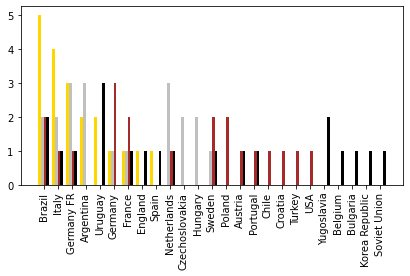

In [107]:
# x축에 그려질 막대그래프들의 위치
x = np.array(list(range(0, len(ranks))))

# 그래프
fig, ax = plt.subplots()

# x 위치에, 항목 이름으로 ranks.index(국가명)
plt.xticks(x, ranks.index, rotation=90)
plt.tight_layout()

# 막대를 차례대로 그립니다.
ax.bar(x - 0.3, ranks['Winner'],     color = 'gold',   width = 0.2, label = 'Winner')
ax.bar(x - 0.1, ranks['Runners_Up'], color = 'silver', width = 0.2, label = 'Runners_Up')
ax.bar(x + 0.1, ranks['Third'],      color = 'brown',  width = 0.2, label = 'Third')
ax.bar(x + 0.3, ranks['Fourth'],     color = 'black',  width = 0.2, label = 'Fourth')



plt.savefig("image.svg", format="svg")

---